Which stop is the bus picking you up from:
1. Student Union East
2. Auxiliary Services
3. Student Health North
4. Martin Hall
5. Lot 6
6. Lot 5A
7. East Deck 2
8. Fretwell North
9. Klien Hall/Science Building
10. Student Union West
11. Athletics Complex  West
12. EPIC North
13. Grigg Hall
14. BATT Cave
15. Portal West
16. CRI Deck
17. Duke Centennial Hall
18. EPIC South
19. Athletics Complex East
 e


Please input a number between 1 and 19:


Which stop is the bus picking you up from:
1. Student Union East
2. Auxiliary Services
3. Student Health North
4. Martin Hall
5. Lot 6
6. Lot 5A
7. East Deck 2
8. Fretwell North
9. Klien Hall/Science Building
10. Student Union West
11. Athletics Complex  West
12. EPIC North
13. Grigg Hall
14. BATT Cave
15. Portal West
16. CRI Deck
17. Duke Centennial Hall
18. EPIC South
19. Athletics Complex East
 18
Which stop is the bus dropping you off at:
1. Student Union East
2. Auxiliary Services
3. Student Health North
4. Martin Hall
5. Lot 6
6. Lot 5A
7. East Deck 2
8. Fretwell North
9. Klien Hall/Science Building
10. Student Union West
11. Athletics Complex  West
12. EPIC North
13. Grigg Hall
14. BATT Cave
15. Portal West
16. CRI Deck
17. Duke Centennial Hall
18. EPIC South
19. Athletics Complex East
 20


Please input a number between 1 and 19:


Which stop is the bus dropping you off at:
1. Student Union East
2. Auxiliary Services
3. Student Health North
4. Martin Hall
5. Lot 6
6. Lot 5A
7. East Deck 2
8. Fretwell North
9. Klien Hall/Science Building
10. Student Union West
11. Athletics Complex  West
12. EPIC North
13. Grigg Hall
14. BATT Cave
15. Portal West
16. CRI Deck
17. Duke Centennial Hall
18. EPIC South
19. Athletics Complex East
 4
Would you like to give information on the nearest bus? 
1. Yes
2. No
 f


Please input a number between 1 and 2:


Would you like to give information on the nearest bus? 
1. Yes
2. No
 2


A bus arrives at EPIC South every 8 minutes and 11 seconds.
The average travel time from EPIC South to Martin Hall is 8 minutes and 17 seconds.
Your estimated time of arrival is in 16 minutes and 29 seconds.


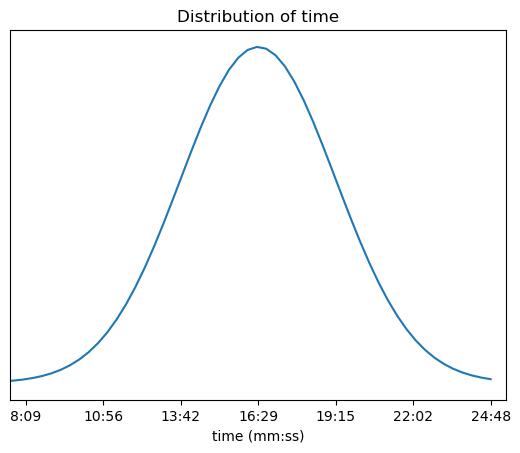

In [8]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#import bus data
file_path = '/Users/darrensummerlee/Downloads/Bus Raw Data - Replaced Null.csv'
bus_data = pd.read_csv(file_path)

#convert tome from hh:mm:ss to total seconds
def time_to_seconds(time_str):
    if isinstance(time_str, str):  
        h, m, s = map(int, time_str.split(':'))
        return h * 3600 + m * 60 + s
    else:
        return 0  

#gather user info
valid_input = False
while (not valid_input):
    try:
        pickup = int(input ("Which stop is the bus picking you up from:\n1. Student Union East\n2. Auxiliary Services\n3. Student Health North\n4. Martin Hall\n5. Lot 6\n6. Lot 5A\n7. East Deck 2\n8. Fretwell North\n9. Klien Hall/Science Building\n10. Student Union West\n11. Athletics Complex  West\n12. EPIC North\n13. Grigg Hall\n14. BATT Cave\n15. Portal West\n16. CRI Deck\n17. Duke Centennial Hall\n18. EPIC South\n19. Athletics Complex East\n"))
        if (pickup < 1 or pickup > 19):
            raise ValueError
        else:
            valid_input = True
    except ValueError:
        print(f"Please input a number between 1 and 19:")

valid_input = False
while (not valid_input):
    try:
        drop_off = int(input ("Which stop is the bus dropping you off at:\n1. Student Union East\n2. Auxiliary Services\n3. Student Health North\n4. Martin Hall\n5. Lot 6\n6. Lot 5A\n7. East Deck 2\n8. Fretwell North\n9. Klien Hall/Science Building\n10. Student Union West\n11. Athletics Complex  West\n12. EPIC North\n13. Grigg Hall\n14. BATT Cave\n15. Portal West\n16. CRI Deck\n17. Duke Centennial Hall\n18. EPIC South\n19. Athletics Complex East\n"))
        if (drop_off < 1 or drop_off > 19):
            raise ValueError
        else:
            valid_input = True
    except ValueError:
        print(f"Please input a number between 1 and 19:")

valid_input = False
while (not valid_input):
    try:
        spec_info = int(input ("Would you like to give information on the nearest bus? \n1. Yes\n2. No\n"))
        if (spec_info < 1 or spec_info > 2):
            raise ValueError
        else:
            valid_input = True
    except ValueError:
        print(f"Please input a number between 1 and 2:")

#map stops to representative ints
stop_mapping = {
    0: "Athletics E",
    1: "Stun E",
    2: "Aux",
    3: "Stu Health",
    4: "Martin",
    5: "Lot 6",
    6: "Lot 5A",
    7: "East Deck",
    8: "Fret N",
    9: "Klien",
    10: "Stun W",
    11: "Athletics W",
    12: "EPIC N",
    13: "Grigg",
    14: "BATT",
    15: "Portal W",
    16: "CRI",
    17: "Duke",
    18: "EPIC S",
    19: "Athletics E",
    20: "Stun E",
    21: "Aux",
    22: "Stu Health",
    23: "Martin",
    24: "Lot 6",
    25: "Lot 5A",
    26: "East Deck",
    27: "Fret N",
    28: "Klien",
    29: "Stun W",
    30: "Athletics W",
    31: "EPIC N",
    32: "Grigg",
    33: "BATT",
    34: "Portal W",
    35: "CRI",
    36: "Duke",
    37: "EPIC S",
    38: "Athletics E",
    39: "Stun E",
    40: "Aux",
    41: "Stu Health",
    42: "Martin",
    43: "Lot 6",
    44: "Lot 5A",
    45: "East Deck",
    46: "Fret N",
    47: "Klien",
    48: "Stun W",
    49: "Athletics W",
    50: "EPIC N",
    51: "Grigg",
    52: "BATT",
    53: "Portal W",
    54: "CRI",
    55: "Duke",
    56: "EPIC S",
    57: "Athletics E"}

#map short hand to official name
true_name = {
    "Stun E": "Student Union East",
    "Aux": "Auxiliary Services",
    "Stu Health": "Student Health North",
    "Martin": "Martin Hall",
    "Lot 6": "Lot 6",
    "Lot 5A": "Lot 5A",
    "East Deck": "East Deack 2",
    "Fret N": "Fretwell North",
    "Klien": "Klien Hall/Science Building",
    "Stun W": "Student Union West",
    "Athletics W": "Athletics Complex West",
    "EPIC N": "EPIC North",
    "Grigg": "Grigg Hall",
    "BATT": "BATT Cave",
    "Portal W": "Portal West",
    "CRI": "CRI Deck",
    "Duke": "Duke Centennial Hall",
    "EPIC S": "EPIC South",
    "Athletics E": "Athletics Complex East"}

ETA_variance = 0

if (spec_info == 2):
    #Find average time it takes for a bus to arrive, without info on the nearest bus.
    
    num_timeslots = bus_data['Time ID'].nunique() #Identify how many groups of data have been collected
    
    interval_list = []
    sum_sqd_diff = 0
    
    for x in range (1, num_timeslots + 1, 1): #going through each group of data, when a bus arrives at our pickup location
        timeslot_data = bus_data[bus_data['Time ID'] == x]
        pickup_data = timeslot_data[timeslot_data['Location'] == stop_mapping[pickup]].copy()
        pickup_data.loc[:, 'Arrive_sec'] = pickup_data['Arrive'].apply(time_to_seconds) #convert hh:mm:ss to seconds past midnight
        arrive_sec_list = pickup_data['Arrive_sec'].tolist()
        arrive_sec_list.sort() #Sort puts the data chronologically, instead of by Bus ID 
        for i in range (1, len(arrive_sec_list), 1):
            if (not arrive_sec_list[i-1] == 0):
                curr_interval = arrive_sec_list[i] - arrive_sec_list[i-1] #How long it took between each bus arriving at pickup location
                interval_list.append(curr_interval)
    
    
    wait_time_avg = statistics.mean(interval_list)
    wait_time_var = statistics.variance(interval_list)
    ETA_variance += wait_time_var
    wait_time_avg_min = int(wait_time_avg / 60)
    wait_time_avg_sec = int(wait_time_avg % 60)
    
    print(f"A bus arrives at {true_name[stop_mapping[pickup]]} every {wait_time_avg_min} minutes and {wait_time_avg_sec} seconds.")
        
if (spec_info == 1):

    valid_input = False
    while (not valid_input):
        try:
            is_moving = int(input("Is the bus currently at a stop or moving?\n1. At a stop\n2. Moving\n"))
            if (is_moving < 1 or is_moving > 2):
                raise ValueError
            else:
                valid_input = True
        except ValueError:
            print(f"Please input a number between 1 and 2:")    
    


    #convert int answer to boolean
    is_moving = is_moving - 1
    bool(is_moving)
    
    #gather bus info
    if (is_moving):
        valid_input = False
        while (not valid_input):
            try:
                curr_stop = int(input("What is the next stop on the nearest buses route?\n1. Student Union East\n2. Auxiliary Services\n3. Student Health North\n4. Martin Hall\n5. Lot 6\n6. Lot 5A\n7. East Deck 2\n8. Fretwell North\n9. Klien Hall/Science Building\n10. Student Union West\n11. Athletics Complex  West\n12. EPIC North\n13. Grigg Hall\n14. BATT Cave\n15. Portal West\n16. CRI Deck\n17. Duke Centennial Hall\n18. EPIC South\n19. Athletics Complex East\n"))
                if (curr_stop < 1 or curr_stop > 19):
                    raise ValueError
                else:
                    valid_input = True
            except ValueError:
                print(f"Please input a number between 1 and 19:")
        
    else:
        valid_input = False
        while (not valid_input):
            try:
                curr_stop = int(input("Where is the nearest bus currently stopped?\n1. Student Union East\n2. Auxiliary Services\n3. Student Health North\n4. Martin Hall\n5. Lot 6\n6. Lot 5A\n7. East Deck 2\n8. Fretwell North\n9. Klien Hall/Science Building\n10. Student Union West\n11. Athletics Complex  West\n12. EPIC North\n13. Grigg Hall\n14. BATT Cave\n15. Portal West\n16. CRI Deck\n17. Duke Centennial Hall\n18. EPIC South\n19. Athletics Complex East\n"))
                if (curr_stop < 1 or curr_stop > 19):
                    raise ValueError
                else:
                    valid_input = True
            except ValueError:
                print(f"Please input a number between 1 and 19:")
        
    
        
    #changes whther or not travel time to the buses next/current stop should be included
    if (not is_moving):
        adjuster = 1
    else:
        adjuster = 0
   
    #fix wrap around numbers (if traveling to the "previous stop" code can still "count up" instead of starting over after 19
    if (curr_stop > pickup):
        pickup_alt = pickup + 19
    else:
        pickup_alt = pickup
    
    if (curr_stop > drop_off):
        drop_off_alt = drop_off + 19
    else:
        drop_off_alt = drop_off
    
    if(pickup_alt > drop_off_alt):
        drop_off_alt = drop_off_alt + 19
                                                            #find average time waiting for bus
    wait_time_avg = 0
    
    #find avg stop time at each stop between curr_stop and pickup
    for x in range (0, pickup_alt - curr_stop, 1):
        
        curr_stop_data = bus_data[bus_data['Location'] == stop_mapping[curr_stop + x]]
        curr_stop_times = pd.to_timedelta(curr_stop_data['stop time']).dropna().dt.total_seconds()
        curr_stop_avg = statistics.mean(curr_stop_times)
        wait_time_avg = wait_time_avg + curr_stop_avg
        curr_stop_var = statistics.variance(curr_stop_times)
        ETA_variance = ETA_variance + curr_stop_var 
    
    #find avg travel time at each stop between curr_stop and pickup
    for x in range (adjuster, pickup_alt - curr_stop + 1, 1):
        curr_stop_data = bus_data[bus_data['Location'] == stop_mapping[curr_stop + x]]
        curr_stop_trav_times = pd.to_timedelta(curr_stop_data['stop time']).dropna().dt.total_seconds()
        curr_stop_trav_avg = statistics.mean(curr_stop_trav_times)
        wait_time_avg = wait_time_avg + curr_stop_trav_avg
        curr_stop_trav_var = statistics.variance(curr_stop_trav_times)
        ETA_variance = ETA_variance + curr_stop_trav_var
    
    #avg time spent waiting for bus
    wait_time_avg_min = int(wait_time_avg / 60)
    wait_time_avg_sec = int(wait_time_avg % 60)
    print(f"The average wait time from {true_name[stop_mapping[curr_stop]]} to {true_name[stop_mapping[pickup]]} is {wait_time_avg_min} minutes and {wait_time_avg_sec} seconds.")
    
                                          #find avg time spent on the bus regardless of spec info

if (spec_info == 2):
    pickup_alt = pickup
    drop_off_alt = drop_off
    if(pickup_alt > drop_off_alt):
        drop_off_alt = drop_off_alt + 19

travel_time_avg = 0
    #find avg stop time while on the bus
for x in range (0, drop_off_alt-pickup_alt, 1):
    curr_stop_data = bus_data[bus_data['Location'] == stop_mapping[pickup_alt + x]]
    curr_stop_times = pd.to_timedelta(curr_stop_data['stop time']).dropna().dt.total_seconds()
    curr_stop_avg = statistics.mean(curr_stop_times)
    travel_time_avg = travel_time_avg + curr_stop_avg
    curr_stop_var = statistics.variance(curr_stop_times)
    ETA_variance = ETA_variance + curr_stop_var
    
#find avg travel time while on bus
for x in range (1, drop_off_alt - pickup_alt + 1, 1):
    curr_stop_data = bus_data[bus_data['Location'] == stop_mapping[pickup_alt + x]]
    curr_stop_trav_times = pd.to_timedelta(curr_stop_data['travel time']).dropna().dt.total_seconds()
    curr_stop_trav_avg = statistics.mean(curr_stop_trav_times)
    travel_time_avg = travel_time_avg + curr_stop_trav_avg
    curr_stop_trav_var = statistics.variance(curr_stop_trav_times)
    ETA_variance = ETA_variance + curr_stop_trav_var

#avg time spent on bus
travel_time_avg_min = int(travel_time_avg / 60)
travel_time_avg_sec = int(travel_time_avg % 60)
print(f"The average travel time from {true_name[stop_mapping[pickup]]} to {true_name[stop_mapping[drop_off]]} is {travel_time_avg_min} minutes and {travel_time_avg_sec} seconds.")

#Estimated time of arrival
ETA = wait_time_avg + travel_time_avg
ETA_min = int(ETA / 60)
ETA_sec = int(ETA % 60)
print(f"Your estimated time of arrival is in {ETA_min} minutes and {ETA_sec} seconds.")
ETA_stdev = ETA_variance ** 0.5

timestamp_ticks = []
seconds_ticks = [ETA - 3 * ETA_stdev, ETA - 2 * ETA_stdev, ETA - 1 * ETA_stdev, ETA, ETA + 1 * ETA_stdev, ETA + 2 * ETA_stdev, ETA + 3 * ETA_stdev]

for ticks in seconds_ticks:
    timestamp_sec = str(int(ticks % 60)).zfill(2)
    timestamp_min = int(ticks / 60)
    timestamp_ticks.append(f'{timestamp_min}:{timestamp_sec}')


time = np.linspace( - 3*ETA_stdev, ETA + 3*ETA_stdev, 100)
plt.xticks(seconds_ticks, timestamp_ticks)
plt.yticks([])
plt.xlim(ETA - 3.2 * ETA_stdev, ETA + 3.2 * ETA_stdev)
plt.plot(time, norm.pdf(time, ETA, ETA_stdev))
plt.title('Distribution of time')
plt.xlabel('time (mm:ss)')
plt.show()